# Projet 3 "La classification d’images pour détecter le cancer de la peau"
###### Réalisé par : *Zaynab ROMENE*

Ressources: 
- https://notebook.community/frreiss/tensorflow-fred/tensorflow/lite/g3doc/tutorials/model_maker_image_classification 
- https://levelup.gitconnected.com/custom-image-classification-model-using-tensorflow-lite-model-maker-68ee4514cd45
- https://stackoverflow.com/questions/65438156/tensorflow-keras-error-unknown-image-file-format-one-of-jpeg-png-gif-bmp-re
- https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/images/classification.ipynb?hl=fr#scrollTo=H74l2DoDI2XD 
- https://notebook.community/frreiss/tensorflow-fred/tensorflow/lite/g3doc/tutorials/model_maker_image_classification

Le but de ce projet est d'analyser les images afin de détecter la présence d'un cancer de la peau. Puisque c'est un projet académique, on s'est concentré sur un seul type de cancer "le mélanome". Il s'agit alors d'une classification binaire. C'est-à-dire l'algorithme détecte s'il s'agit d'un cancer mélanome ou bien un cas normal. 

Nous devons d'abord installer plusieurs packages requis, y compris le package Model Maker.

In [1]:
!sudo apt -y install libportaudio2
!pip install -q tflite-model-maker

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 65.4 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Fetched 65.4 kB in 0s (177 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Tele

On importe par la suite les packages requis.

In [2]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


On définit le chemin d'accès à notre données d'image. Dans mon cas, j'ai mis toute la base de données dans /content/drive/MyDrive/Dataset

In [3]:
import os

root_path = "/content/drive/MyDrive/"    
image_path = os.path.join(os.path.dirname(root_path), 'Dataset/')
print (image_path)

/content/drive/MyDrive/Dataset/


In [4]:
!rmdir /content/drive/MyDrive/Dataset/Cancer_Skin/.ipynb_checkpoints
!rmdir /content/drive/MyDrive/Dataset/Safe_Skin/.ipynb_checkpoints
!rmdir /content/drive/MyDrive/Dataset/.ipynb_checkpoints

rmdir: failed to remove '/content/drive/MyDrive/Dataset/Cancer_Skin/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/drive/MyDrive/Dataset/Safe_Skin/.ipynb_checkpoints': No such file or directory
rmdir: failed to remove '/content/drive/MyDrive/Dataset/.ipynb_checkpoints': No such file or directory


On fait une première répartition de données 80/20 entre les données d'entraînement et les données de test.

In [5]:
data = DataLoader.from_folder(image_path)
train_data, rest_data = data.split(0.8)

On fait une deuxième répartition 50/50 des données de test qui restent en "test_data" et "validation_data"

In [6]:
validation_data, test_data = rest_data.split(0.5)

On peut afficher 25 exemples d'images avec des étiquettes (labels) juste pour vérifier que les deux classes (catégories) d'images ont été bien lues.

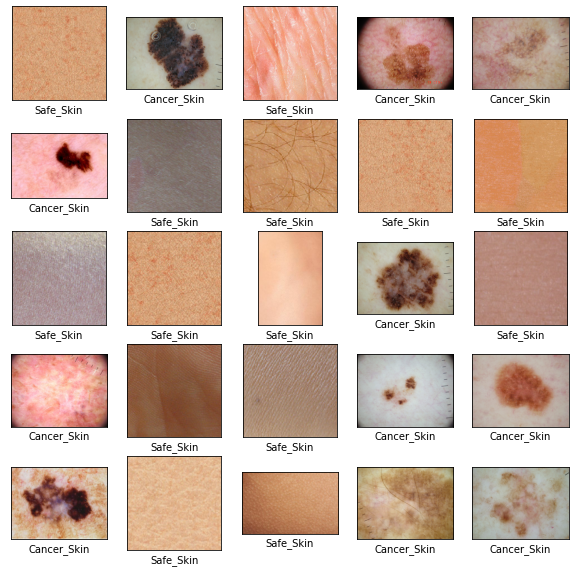

In [7]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [8]:
!pip install tensorflow==2.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 45.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.4
    Uninstalling tensorflow-2.8.4:
      

Python a de nombreux modules dans sa bibliothèque standard, et celui qui aide ici est imghdr. Il vous permet d'identifier le type d'image contenu dans un fichier. L'imghdr peut reconnaître les types d'images suivants : rgb, gif, pbm, pgm, ppm, tiff, rast, xbm, jpeg/jpg, bmp, png, webp et exr.  C'est indispensable de vérifier si l'image est utilisable ou non avant de générer le modèle.
On peut rechercher un type d'image, pas un nom d'extension, par le code suivant: 

In [9]:
import os
import cv2
import imghdr

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                tip = imghdr.what(f_path)
                if ext_list.count(tip) == 0:
                  bad_images.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'/content/drive/MyDrive/Dataset/'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  Safe_Skin
processing class directory  Cancer_Skin
 no improper image files were found


On passe maintenant à l'entraînement du modèle. Les paramaitres sont: 

- Les données d'entraînement seront utilisées pour réellement former le modèle. 
- Les données de validation seront utilisées pour vérifier les performances du modèle après chaque cycle d'entraînement.
-Le nombre d'époques qui définit le nombre de cycles d'entraînement (plus il y a d'époques, plus votre modèle mettra de temps à s'entraîner)
- La spécification du modèle qui est un modèle d'image générique pré-entraîné.

In [19]:
model = image_classifier.create(train_data, model_spec=model_spec.get('efficientnet_lite0'), validation_data=validation_data, epochs = 20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/20


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
21/21 [==============================] - ETA: 0s - loss: 0.3511 - accuracy: 0.9062

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
21/21 [==============================] - 39s 2s/step - loss: 0.3511 - accuracy: 0.9062 - val_loss: 0.2820 - val_accuracy: 1.0000
Epoch 2/20
21/21 [==============================] - 33s 2s/step - loss: 0.2630 - accuracy: 0.9955 - val_loss: 0.2316 - val_accuracy: 1.0000
Epoch 3/20
21/21 [==============================] - 33s 2s/step - loss: 0.2276 - accuracy: 0.9970 - val_loss: 0.2199 - val_accuracy: 1.0000
Epoch 4/20
21/21 [==============================] - 36s 2s/step - loss: 0.2225 - accuracy: 1.0000 - val_loss: 0.2169 - val_accuracy: 1.0000
Epoch 5/20
21/21 [==============================] - 32s 2s/step - loss: 0.2189 - accuracy: 1.0000 - val_loss

Une fois que le modèle a fini de s'exécuter, on peut l'évaluer par rapport aux "test_data" qu'il n'a jamais vus auparavant.

In [20]:
loss, accuracy = model.evaluate(test_data)

3/3 [==============================] - 6s 803ms/step - loss: 0.2106 - accuracy: 1.0000


Ensuite, On convertit le modèle existant au format de modèle TensorFlow Lite et on enregistre les étiquettes d'image dans le fichier d'étiquettes (labels). Le nom de fichier TFLite par défaut est model.tflite, le nom de fichier d'étiquette ( fichier qui contient les labels) est label.txt.

In [12]:
model.export(export_dir='.')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('name', 'regularizer'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('name', 'regularizer'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7fb27b86b1f0>: no matching AST found among candidates:
# coding=utf-8
(lambda : _wrap_initializer(obj))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7fb27b86b1f0>: no matching AST found among candidates:
# coding=utf-8
(lambda : _wrap_initializer(obj))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  graph's last operation is a Print op, just specify that op's name in


Voici la structure détaillée du modèle:

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 3,415,586
Trainable params: 2,562
Non-trainable params: 3,413,024
_________________________________________________________________


On peut remarquer maintenant un fichier model.tflite dans le dossier '/content/'. 
 Pour accéder aux données sérialisées de notre programme, nous devons les compiler dans l'exécutable et les stocker en Flash. La façon la plus simple de le faire est de convertir le fichier en un tableau de données C.
Ceci peut être fait par les commandes suivantes:


In [14]:
# Install xxd if it is not available
! apt-get -qq install xxd
# Save the file as a C source file
! xxd -i model.tflite > model_data.cc

Afin de réduire la taille de modèle, il est commode de l'optimiser. La quantification post-formation est une technique de conversion qui peut réduire la taille du modèle et la latence d’inférence, tout en améliorant la latence du processeur et de l’accélérateur matériel, avec peu de dégradation de la précision du modèle. 

In [26]:
config = QuantizationConfig.for_int8(representative_data=test_data)

In [27]:
model.export(export_dir='.', tflite_filename='model_quant.tflite', quantization_config=config)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('signature_function', 'signature_key'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('name', 'regularizer'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('name', 'regularizer'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f6033ea2280>: no matching AST found among candidates:
# coding=utf-8
(lambda : _wrap_initializer(obj))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: could not parse the source code of <function _trace_resource_initializers.<locals>._wrap_obj_initializer.<locals>.<lambda> at 0x7f6033ea2280>: no matching AST found among candidates:
# coding=utf-8
(lambda : _wrap_initializer(obj))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  graph's last operation is a Print op, just specify that op's name in


In [28]:
# Install xxd if it is not available
! apt-get -qq install xxd
# Save the file as a C source file
! xxd -i model_quant.tflite > model_quant_data.cc